![alt text](https://i.imgur.com/1WaY7aA.png)

---



---



# Lab 2.2.2 
# *Mining Social Media with Twitter*

## The Twitter API and Tweepy Package

The Twitter API provides access to tweets and comments, and allows an application to post tweets to the user's timeline. 

Twitter requires developers to create and authenticate an app before they can use the API. As of recent policy changes, however, new developers must be approved before they can create an app. There is no indication of the waiting period for approval.

### 1. Apply for Developer Access

Go to https://blog.twitter.com/developer/en_us/topics/tools/2018/new-developer-requirements-to-protect-our-platform.html
and read the advice.
![image.png](attachment:image.png)

Apply at https://developer.twitter.com/en/apply-for-access.html
![image.png](attachment:image.png)

Then go to https://developer.twitter.com/en/review every day until you see whatever comes after this: 
![image.png](attachment:image.png)

### 2. Create Your Twitter App
![image.png](attachment:image.png)

### 3. Load Python Libraries

In [2]:
# !pip install tweepy

You are using pip version 19.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [1]:
import tweepy
import json
import pprint

### 4. Authenticate from your Python script

You could assign your authentication details explicitly, as follows:

In [2]:
my_consumer_key = 'GS7kRxkpveBFqpey6myCwJ01d'      # your consumer key (string) goes in here
my_consumer_secret = 'gGc9bnCGYQvjDY8M47foKmRSdl6FuFqmOIAOIJMn4M39rIlXUT'   # your consumer secret key (string) goes in here
my_access_token = '82147042-L7wiMqxZqib6XiLdpphwskaKGKfEjZfMw4mhEdMOr'      # your access token (string goes in here
access_token_secret = 'EZvfP55xXAmqymu3SpDL8yxVKVOe9DFYYFwfiaBbMWckW'  # your access token secret (string) goes in here

In [3]:
import json

auth_twitter_json = {
    'consumer_key': 'GS7kRxkpveBFqpey6myCwJ01d'      # your consumer key (string) goes in here
    , 'consumer_secret': 'gGc9bnCGYQvjDY8M47foKmRSdl6FuFqmOIAOIJMn4M39rIlXUT'   # your consumer secret key (string) goes in here
    , 'access_token': '82147042-L7wiMqxZqib6XiLdpphwskaKGKfEjZfMw4mhEdMOr'      # your access token (string goes in here
    , 'access_token_secret': 'EZvfP55xXAmqymu3SpDL8yxVKVOe9DFYYFwfiaBbMWckW'  # your access token secret (string) goes in here
}

with open('auth_twitter.json', 'w') as outfile:  
    json.dump(auth_twitter_json, outfile)

A better way would be to store these details externally, so they are not displayed in the notebook:

- create a file called "auth_twitter.json" in your "notebooks" directory, and save your credentials there in JSON format:

`{   "consumer_key": "your consumer key (string) goes in here",` <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;` "consumer_secret": "your consumer secret key (string) goes in here",` <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`"access_token": "your access token (string) goes in here",` <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`"access_token_secret": "your access token secret (string) goes in here"` <br>
`}`

(Nb. Parsers are very fussy. Make sure each key:value pair has a comma after it except the last one!)  

Use the following code to load the credentials:  

In [4]:
pwd()  # make sure your working directory is where the file is

'C:\\Users\\Faisal\\DSIA\\Data-Science-Curriculum\\Module 2\\LABS\\Lab Answers'

In [5]:
path_auth = 'auth_twitter.json'
auth = json.loads(open(path_auth).read())
pp = pprint.PrettyPrinter(indent=4)
# For debugging only:
pp.pprint(auth)

{   'access_token': '82147042-L7wiMqxZqib6XiLdpphwskaKGKfEjZfMw4mhEdMOr',
    'access_token_secret': 'EZvfP55xXAmqymu3SpDL8yxVKVOe9DFYYFwfiaBbMWckW',
    'consumer_key': 'GS7kRxkpveBFqpey6myCwJ01d',
    'consumer_secret': 'gGc9bnCGYQvjDY8M47foKmRSdl6FuFqmOIAOIJMn4M39rIlXUT'}


In [6]:
my_consumer_key = auth['consumer_key']
my_consumer_secret = auth['consumer_secret']
my_access_token = auth['access_token']
my_access_token_secret = auth['access_token_secret']

Security considerations: 
- this method only keeps your credentials invisible as long as nobody accesses this notebook while it's running on your computer 
- if you wanted another user to have access to the executable notebook without divulging your credentials you should set up an OAuth 2.0 workflow to let them obtain and apply their own API tokens when using your app
- if you just want to share your analyses, you could use a separate script (which you don't share) to fetch the data and save it locally, then use a second notebook (with no API access) to load and analyse the locally stored data

### 5. Exploring the API

Here is how to connect to Twitter using the Tweepy library:

In [7]:
auth = tweepy.OAuthHandler(my_consumer_key, my_consumer_secret)
auth.set_access_token(my_access_token, my_access_token_secret)
api = tweepy.API(auth)

In the next cell, put the cursor after the '.' and hit the [tab] key to see the available members and methods in the response object:

In [8]:
api.followers()[0]._json

{'blocked_by': False,
 'blocking': False,
 'contributors_enabled': False,
 'created_at': 'Tue Jul 19 18:27:49 +0000 2016',
 'default_profile': False,
 'default_profile_image': False,
 'description': 'change your life with one life quote. Life quotes will give new meaning to life.',
 'entities': {'description': {'urls': []}},
 'favourites_count': 8133,
 'follow_request_sent': False,
 'followers_count': 48901,
 'following': False,
 'friends_count': 53587,
 'geo_enabled': False,
 'has_extended_profile': True,
 'id': 755469207312228352,
 'id_str': '755469207312228352',
 'is_translation_enabled': False,
 'is_translator': False,
 'lang': None,
 'listed_count': 97,
 'live_following': False,
 'location': 'Nomad',
 'muting': False,
 'name': 'Life Quotes💟',
 'notifications': False,
 'profile_background_color': '000000',
 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png',
 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png',
 

Consult the Tweept and Twitter API documentation. Print a few of the response members below:

This will fetch recent tweets from accounts you follow:

In [9]:
# Recent tweets from accounts you follow:
tweets = api.home_timeline()
for tweet in tweets:
    print(tweet.text)

CC123: TP-Link TL-PA9020P KIT Gigabit Passthrough Powerline Kit $108 Delivered @ Futu_online/SydneyTec eBay https://t.co/NwDInUtg98
Income tax cuts calculator: how much money you will get – explained https://t.co/jEtV2TzfCN
Dear new BJP MPs of Bengal, your party's govt has announced more than 2000 vacancies of EPFO assistant positions of… https://t.co/TagioPFX0a
An amazing photograph of a Blackfoot women. Photo: 1900. - National Anthropological Archives, Smithsonian Instituti… https://t.co/oOlHg9yH4b
Garagesale: Cod Mdern Warfare Xb1/Ps4 https://t.co/m1TdqLCBCI
haritone: Samsonite: 40% off Full Priced Items https://t.co/ZGXQowyQI9
beatthatflight: Jetstar Frenzy - O/W Mel to Ho Chi Minh City $219 (Business $509), Mel to Syd $61, Syd to Mel (AVV)… https://t.co/1TYNIF2xnp
Australia's Handscomb replaces injured Marsh in World Cup squad https://t.co/LzBM7ySkZ2 https://t.co/SqhKWhIIFg
"We played good cricket here in the last five games. We showed our [ability] against 🇮🇳, 🇧🇩, 🇵🇰 and also tod

The request to see your own recent tweets is similar, but uses the `user_timeline` endpoint. Try this below:

In [10]:
#ANSWER:
# Your recent tweets:
tweets = api.user_timeline()
for tweet in tweets:
    print(tweet.text)

@AmlanMostakim Is there any list of Bangladeshi players from 1999-2019 who have not played any game despite being in the squad?
RT @gauravkapur: Champions 🙌 https://t.co/g5yve3pmT5
RT @alfcaroevan: Damn! #BottleCapChallenge🍾 https://t.co/OtBdTYiWHi
গরুর জগতের মেসি। https://t.co/NdBg3xN20O
RT @HomerOpines: If Sanjay Manjrekar hhad spent even a fraction of the time he spends analyzing Dhoni’s batting to analyzing his commentary…
@mtanmay 😂🤣
😂🤣 https://t.co/9tjqoYDrwC
Did not India reach final of 2003 WC under Ganguly? Not a bad effort for the worst team. https://t.co/22glDCkTrd
RT @Benedict_B: OK - so far @OfficialCSA beat @OfficialSLC who beat @ECB_cricket who beat @BCCI who beat @CricketAus who beat @BCBtigers wh…
😂 https://t.co/Cz75a9q0u8
Hannan Sarkar can give it a try.

হান্নান সরকার চেষ্টা করে দেখতে পারেন। https://t.co/rq58E2COk6
RT @suhel: Happy Sanath Jayasuriya day to cricket fans the world over!

Happy 50th, legend :) 

@Sanath07 is the reason I became a fan of t…
Is there any 

Now, instead of printing the text of each tweet, print the `created_at` and `id_str` methods:

In [11]:
#ANSWER:
# tweets header info
tweets = api.user_timeline()
for tweet in tweets:
    print(tweet.created_at)
#     print(tweet.id_str)
    print(tweet.text)

2019-07-05 02:24:24
@AmlanMostakim Is there any list of Bangladeshi players from 1999-2019 who have not played any game despite being in the squad?
2019-07-04 14:31:40
RT @gauravkapur: Champions 🙌 https://t.co/g5yve3pmT5
2019-07-03 14:04:02
RT @alfcaroevan: Damn! #BottleCapChallenge🍾 https://t.co/OtBdTYiWHi
2019-07-03 13:55:47
গরুর জগতের মেসি। https://t.co/NdBg3xN20O
2019-07-02 14:21:46
RT @HomerOpines: If Sanjay Manjrekar hhad spent even a fraction of the time he spends analyzing Dhoni’s batting to analyzing his commentary…
2019-07-01 13:56:51
@mtanmay 😂🤣
2019-07-01 13:48:33
😂🤣 https://t.co/9tjqoYDrwC
2019-07-01 13:44:06
Did not India reach final of 2003 WC under Ganguly? Not a bad effort for the worst team. https://t.co/22glDCkTrd
2019-07-01 03:52:18
RT @Benedict_B: OK - so far @OfficialCSA beat @OfficialSLC who beat @ECB_cricket who beat @BCCI who beat @CricketAus who beat @BCBtigers wh…
2019-07-01 03:50:52
😂 https://t.co/Cz75a9q0u8
2019-06-30 11:40:36
Hannan Sarkar can give it a tr

In [12]:
tweet_list = []
for tweet in tweets:
    tweet_list.append(tweet._json)

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
df = pd.DataFrame(tweet_list)

In [15]:
df['created_at'] = pd.to_datetime(df['created_at'])
df.set_index('created_at', inplace=True)

In [16]:
df.dtypes

contributors                  object
coordinates                   object
entities                      object
extended_entities             object
favorite_count                 int64
favorited                       bool
geo                           object
id                             int64
id_str                        object
in_reply_to_screen_name       object
in_reply_to_status_id        float64
in_reply_to_status_id_str     object
in_reply_to_user_id          float64
in_reply_to_user_id_str       object
is_quote_status                 bool
lang                          object
place                         object
possibly_sensitive            object
quoted_status                 object
quoted_status_id             float64
quoted_status_id_str          object
retweet_count                  int64
retweeted                       bool
retweeted_status              object
source                        object
text                          object
truncated                       bool
u

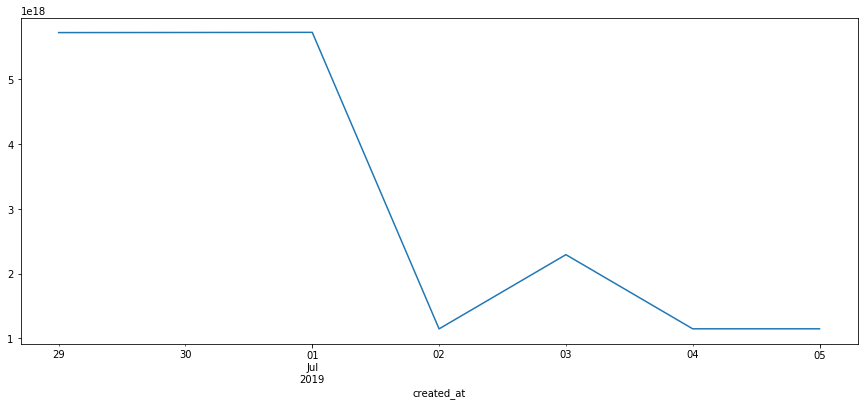

In [17]:
y = df['id'].resample('D').sum()
y.plot(figsize=(15, 6));

In [18]:
from wordcloud import WordCloud, STOPWORDS

In [25]:
def check_tweets(twitter_handle):
    json_str = []
    for status in tweepy.Cursor(api.user_timeline,id=twitter_handle).items(2000):
        json_str.append(status._json)
    
    df = pd.DataFrame(json_str)
    df['created_at'] = pd.to_datetime(df['created_at'])
    df.set_index('created_at', inplace=True)
    
    y = df['id'].resample('D').count()
    y.plot(figsize=(15, 6))
    plt.show();

In [27]:
def check_tweets_wordcloud(twitter_handle, withall=True):
    json_str = []
    for status in tweepy.Cursor(api.user_timeline,id=twitter_handle).items(2000):
        json_str.append(status._json)
    
    df = pd.DataFrame(json_str)
    
    if withall: 
        text = df.text.values
    else:
        text = ','.join([x for x in df.text.values])
        blob = TextBlob(text)
        text = blob.noun_phrases
    
    wordcloud = WordCloud(
        width = 3000
        , height = 2000
        , background_color = 'black'
        , stopwords = STOPWORDS
    ).generate(str(text))
    
    fig = plt.figure(figsize = (40, 30), facecolor = 'k', edgecolor = 'k')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.show();

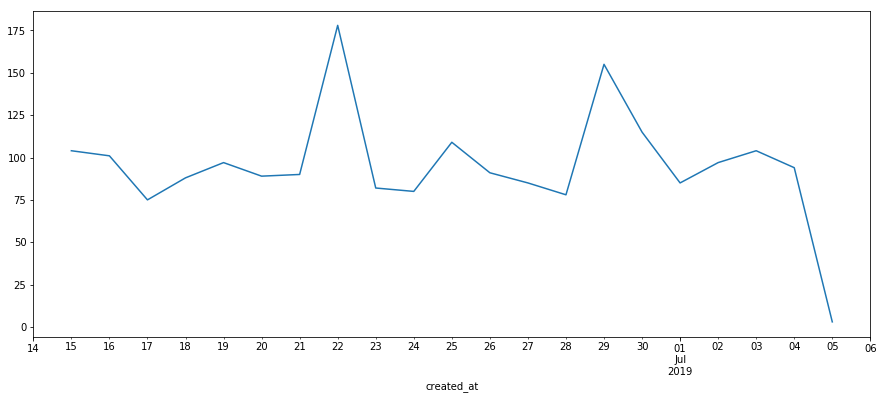

In [26]:
check_tweets('cricketworldcup')

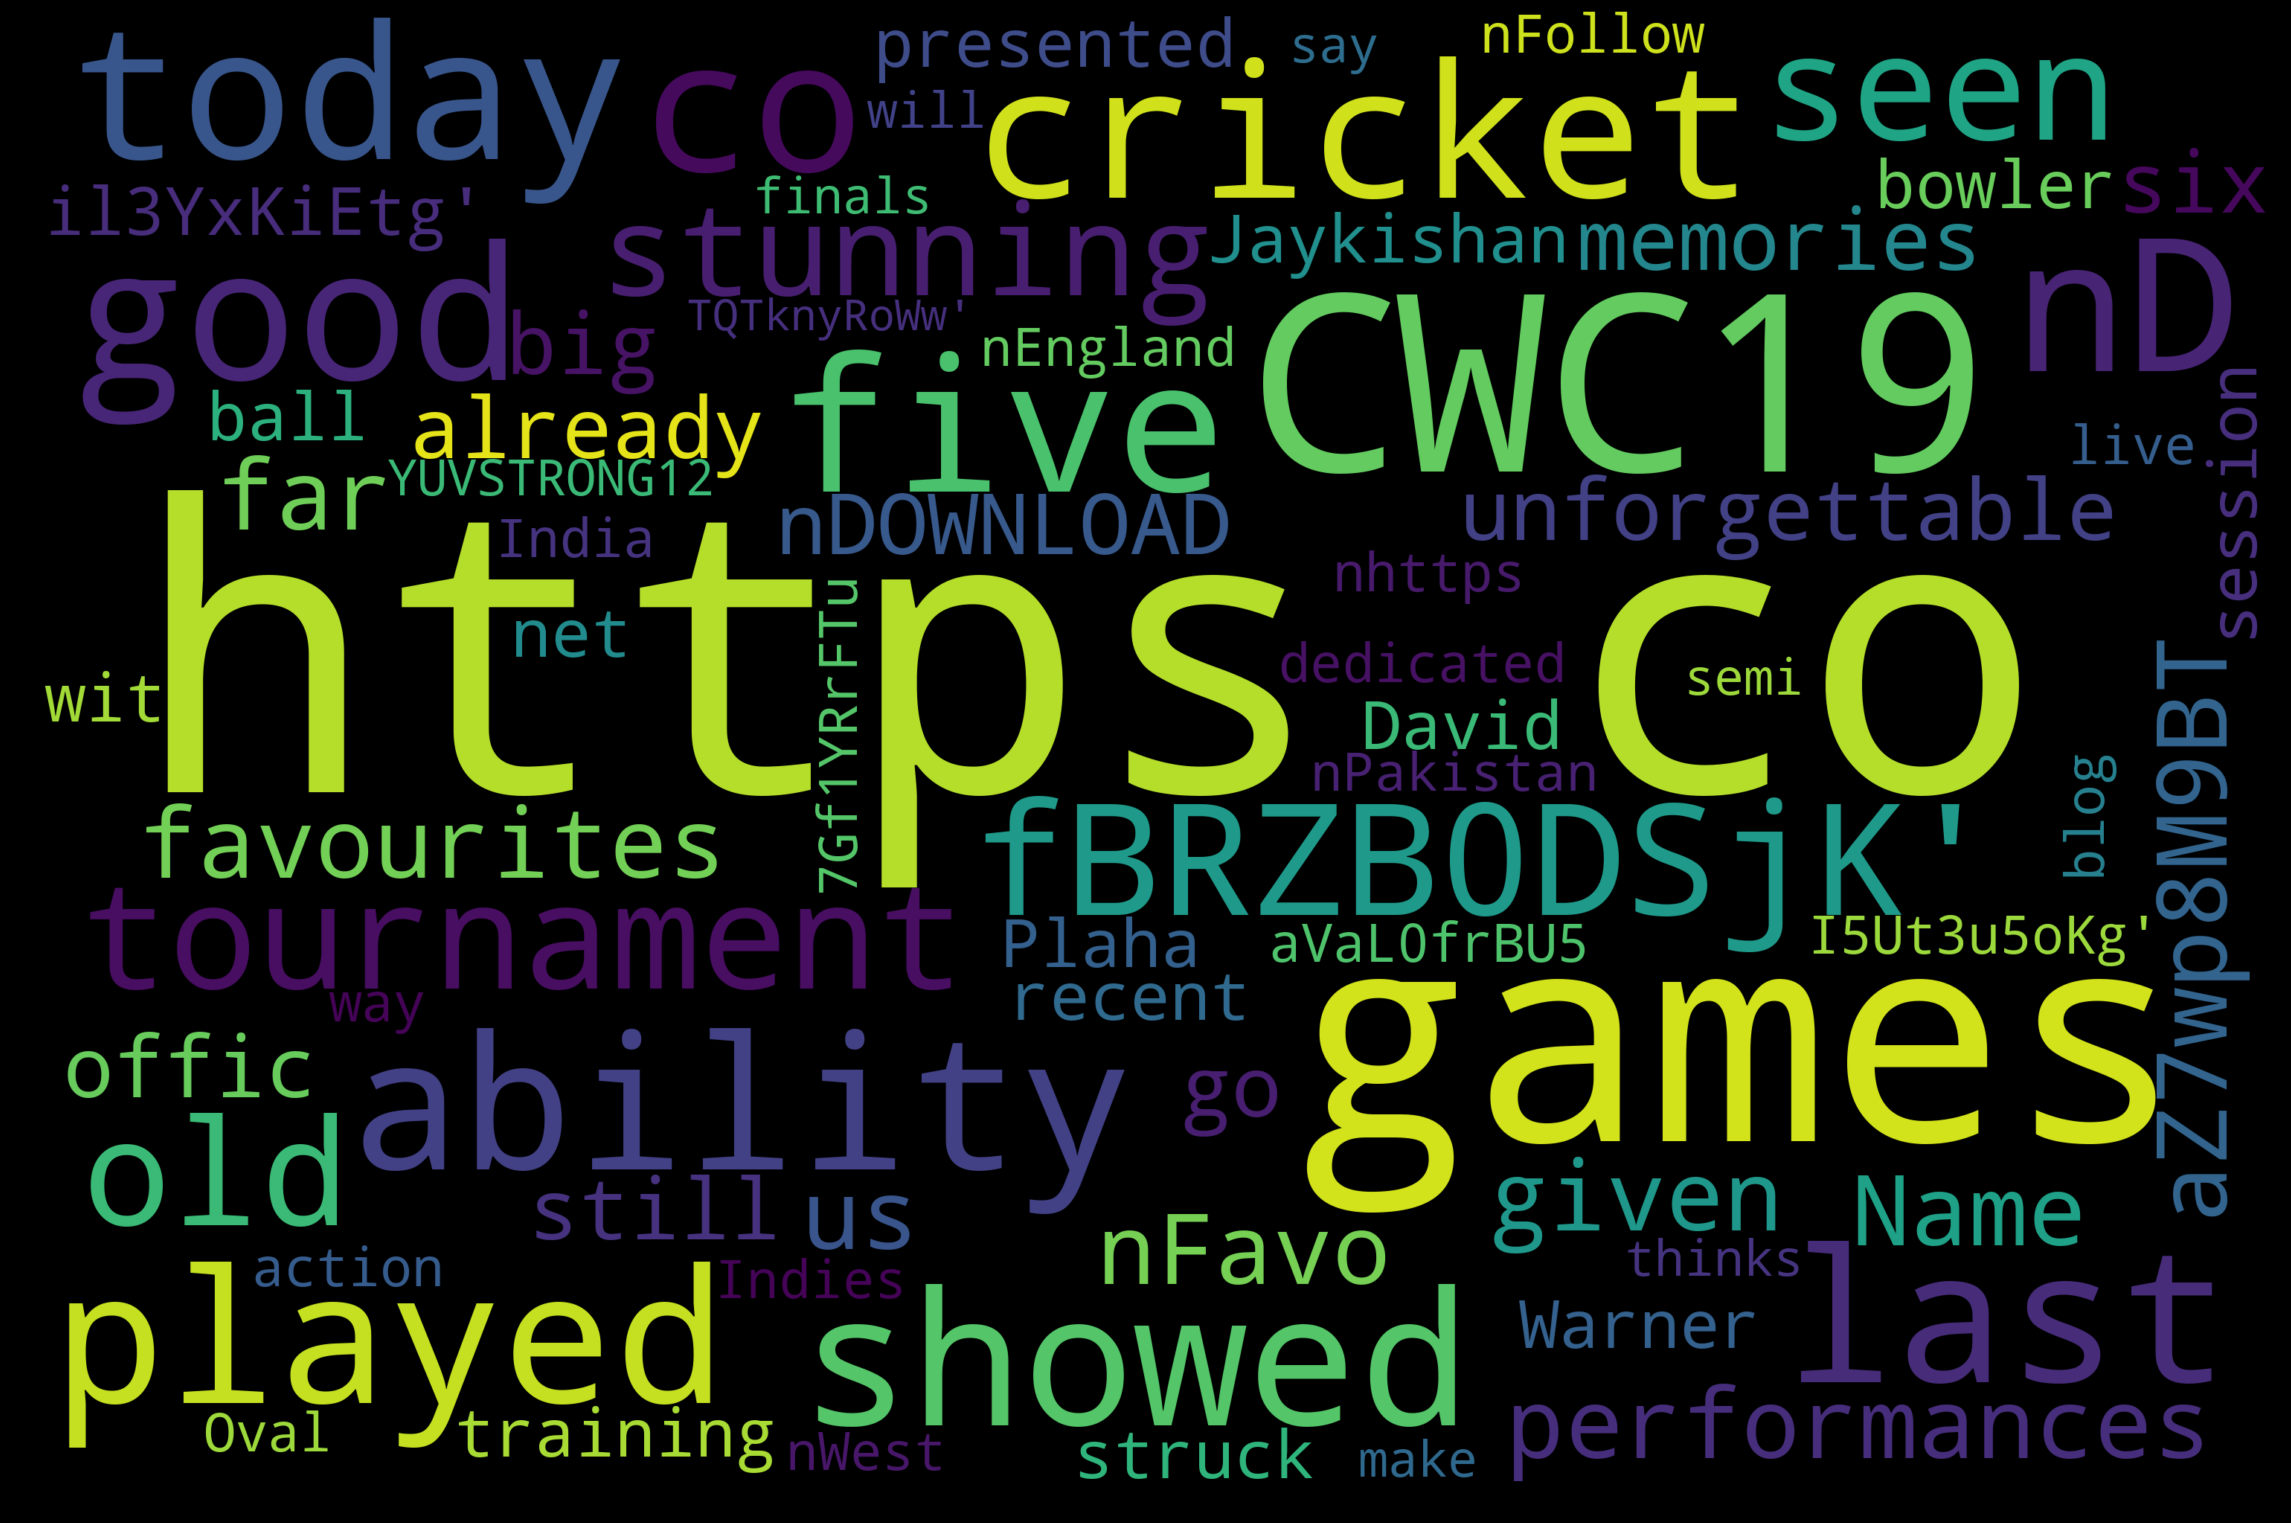

In [28]:
check_tweets_wordcloud('cricketworldcup', withall=True)

You can create a tweet as follows:

In [33]:
# create a tweet:
tweet = api.update_status('Test: Made with Tweepy')

(Nb. Don't abuse this feature! If you try to generate a zillion tweets in a loop, Twitter will ban youur account.)

Tweets can be deleted by reference to their `id_str` attribute:

In [34]:
# delete a tweet:
status = api.destroy_status(tweet.id_str)

You can follow a Tweeter:

In [0]:
# follow:
api.create_friendship('@YouTube')

or unfollow:

In [0]:
# unfollow:
api.destroy_friendship('@YouTube')

>
>
>
>
>

>
>




---



---

> > > > > > > > > © 2019 Data Science Institute of Australia



---



---

